In [1]:
# 1. Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

print('Setup Complete!')

Setup Complete!


In [2]:
# 2. Load the dataset
url = "https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv"
data = pd.read_csv(url)
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [4]:
# 3. Data Exploration
# Apply One-Hot Encoding to ocean_proximity
df_encoded = pd.get_dummies(data, columns=['ocean_proximity'], drop_first=True)
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   20640 non-null  float64
 1   latitude                    20640 non-null  float64
 2   housing_median_age          20640 non-null  float64
 3   total_rooms                 20640 non-null  float64
 4   total_bedrooms              20433 non-null  float64
 5   population                  20640 non-null  float64
 6   households                  20640 non-null  float64
 7   median_income               20640 non-null  float64
 8   median_house_value          20640 non-null  float64
 9   ocean_proximity_INLAND      20640 non-null  bool   
 10  ocean_proximity_ISLAND      20640 non-null  bool   
 11  ocean_proximity_NEAR BAY    20640 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  20640 non-null  bool   
dtypes: bool(4), float64(9)
memory u

In [5]:
# 4. Handle missing values
df_encoded['total_bedrooms'] = df_encoded['total_bedrooms'].fillna(df_encoded['total_rooms'] / df_encoded['households'])

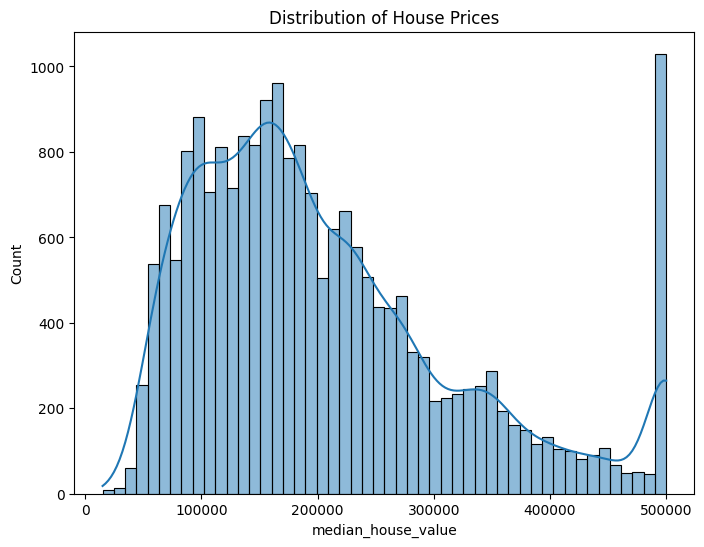

In [6]:
# Histogram for house prices
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['median_house_value'], bins=50, kde=True)
plt.title('Distribution of House Prices')
plt.show()

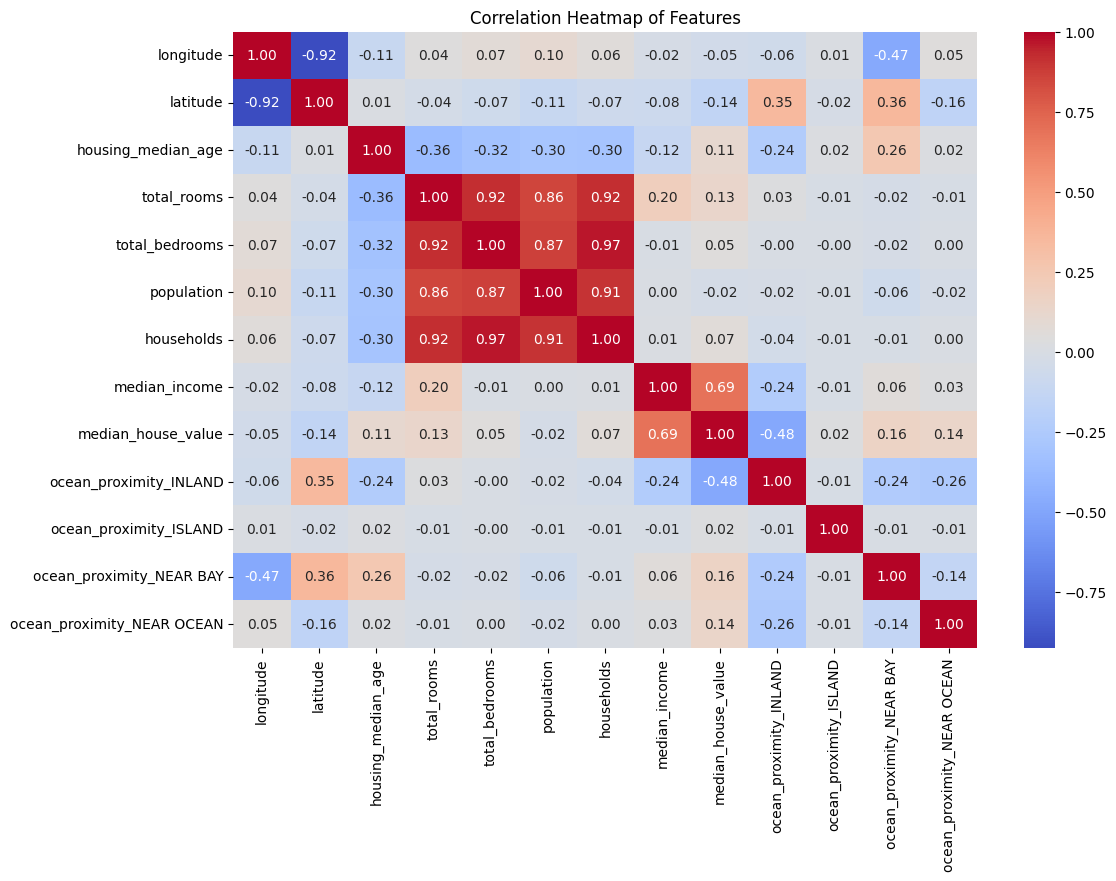

In [7]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [8]:
target = 'median_house_value'
features = df_encoded.columns.drop([target])

In [9]:
# 5. Split the data into training and testing sets
X = df_encoded[features]
y = df_encoded[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# 6. Create and train the models
models = {
    "Linear Regression": Pipeline(steps=[
                                         ('model', LinearRegression())]),
    "Random Forest": Pipeline(steps=[
                                     ('model', RandomForestRegressor(random_state=42))]),
    "Gradient Boosting": Pipeline(steps=[
                                         ('model', GradientBoostingRegressor(random_state=42))])
}


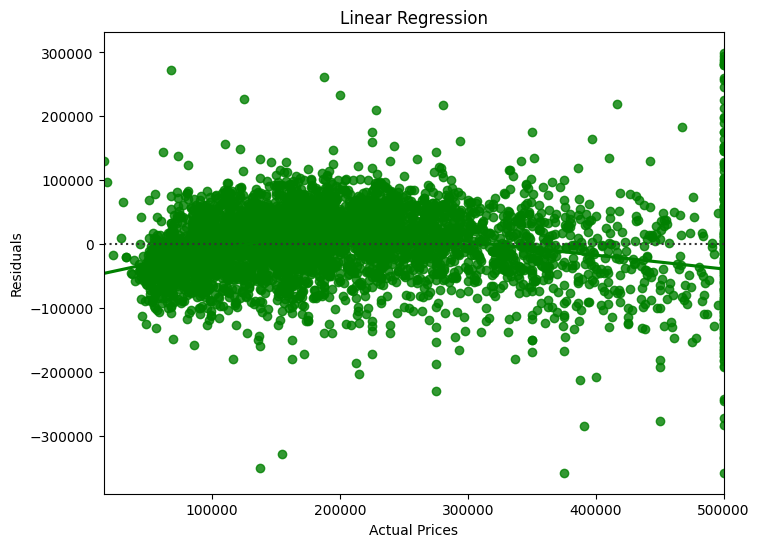

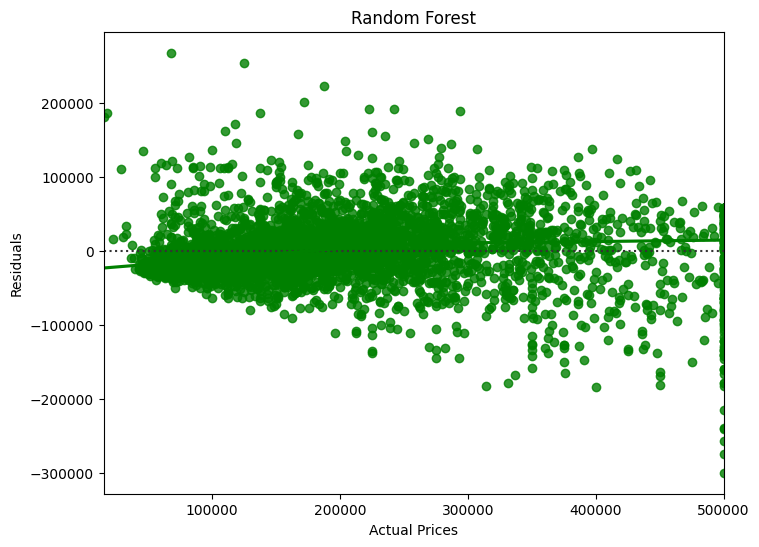

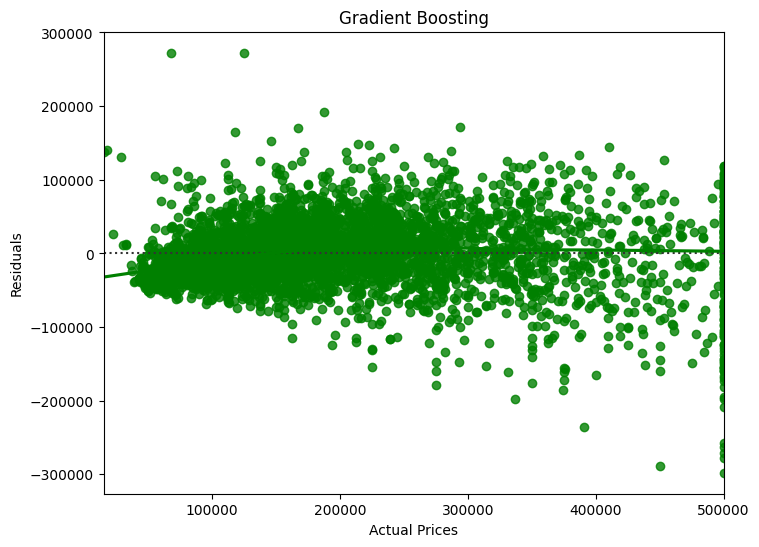

In [11]:
# 7. Evaluate the models
results = {}
for name, pipeline in models.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Feature Importance": model.named_steps['model'].feature_importances_ if hasattr(model.named_steps['model'], 'feature_importances_') else None
    }
    # Residual plot for model evaluation
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
    plt.title(name)
    plt.xlabel('Actual Prices')
    plt.ylabel('Residuals')
    plt.show()

In [12]:
# 8. Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f" - MAE: {metrics['MAE']}")
    print(f" - MSE: {metrics['MSE']}")
    print(f" - R2: {metrics['R2']}")
    if metrics['Feature Importance'] is not None:
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': metrics['Feature Importance']
        }).sort_values(by='Importance', ascending=False)
        print(" - Feature Importance:\n", importance_df.head(10),"\n")
    else:
        print("")
        

Linear Regression:
 - MAE: 51302.18174581491
 - MSE: 5046979162.54038
 - R2: 0.614854656344352

Random Forest:
 - MAE: 32264.161090116275
 - MSE: 2488228235.5708313
 - R2: 0.8101181938702036
 - Feature Importance:
                        Feature  Importance
7                median_income    0.490717
8       ocean_proximity_INLAND    0.140933
0                    longitude    0.106093
1                     latitude    0.101897
2           housing_median_age    0.052065
5                   population    0.032511
4               total_bedrooms    0.023960
3                  total_rooms    0.023412
6                   households    0.018376
11  ocean_proximity_NEAR OCEAN    0.008793 

Gradient Boosting:
 - MAE: 38216.71675015964
 - MSE: 3127232735.8505507
 - R2: 0.7613544482846444
 - Feature Importance:
                        Feature  Importance
7                median_income    0.588018
8       ocean_proximity_INLAND    0.168416
0                    longitude    0.086303
1               

In [13]:
# 9. Final Conclusion
best_model_name = min(results, key=lambda k: results[k]["MAE"])
print(f"The best model is {best_model_name} with the lowest MAE of {results[best_model_name]['MAE']}")

The best model is Random Forest with the lowest MAE of 32264.161090116275


# Addressing outliers with filtering cap

In [14]:
# Remove rows where median_house_value is capped at 500,000
df_encoded_filtered = df_encoded[df_encoded['median_house_value'] < 500000].reset_index(drop=True)

In [15]:
df_encoded_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19648 non-null  float64
 1   latitude                    19648 non-null  float64
 2   housing_median_age          19648 non-null  float64
 3   total_rooms                 19648 non-null  float64
 4   total_bedrooms              19648 non-null  float64
 5   population                  19648 non-null  float64
 6   households                  19648 non-null  float64
 7   median_income               19648 non-null  float64
 8   median_house_value          19648 non-null  float64
 9   ocean_proximity_INLAND      19648 non-null  bool   
 10  ocean_proximity_ISLAND      19648 non-null  bool   
 11  ocean_proximity_NEAR BAY    19648 non-null  bool   
 12  ocean_proximity_NEAR OCEAN  19648 non-null  bool   
dtypes: bool(4), float64(9)
memory u

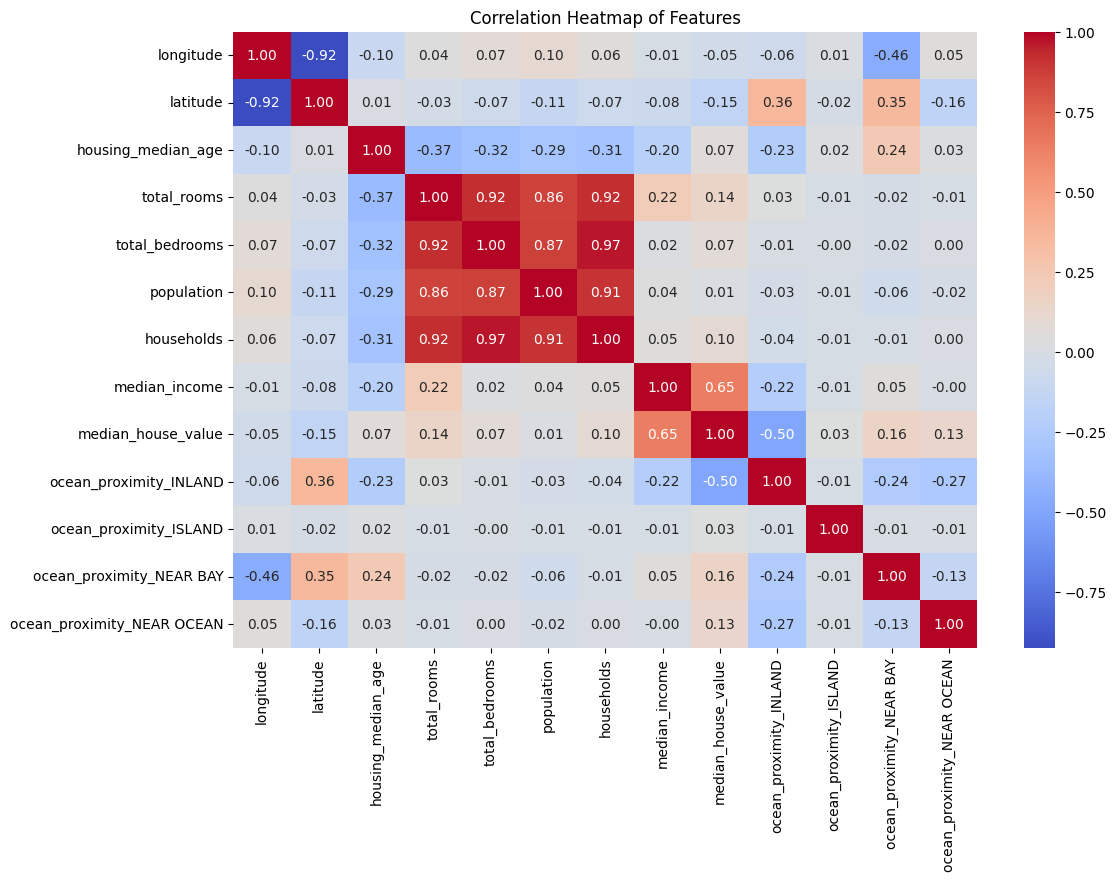

In [16]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [17]:
target_filtered = 'median_house_value'
features_filtered = df_encoded_filtered.columns.drop([target_filtered])

In [18]:
# 5. Split the data into training and testing sets
X = df_encoded_filtered[features_filtered]
y = df_encoded_filtered[target_filtered]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

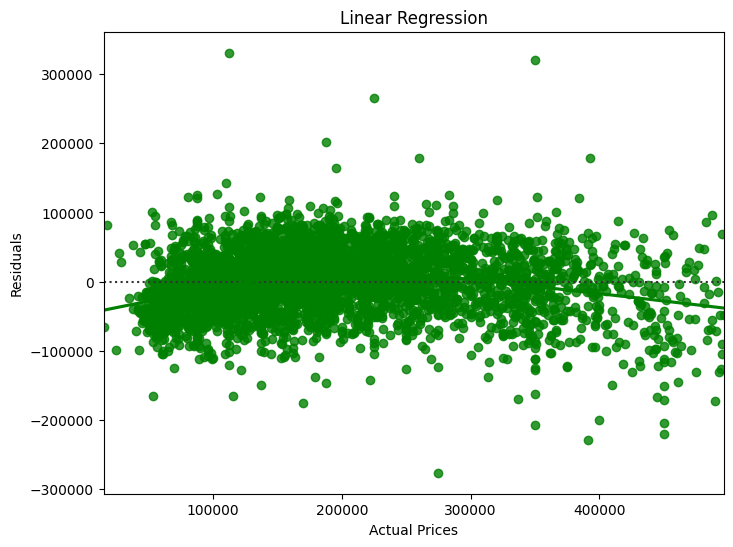

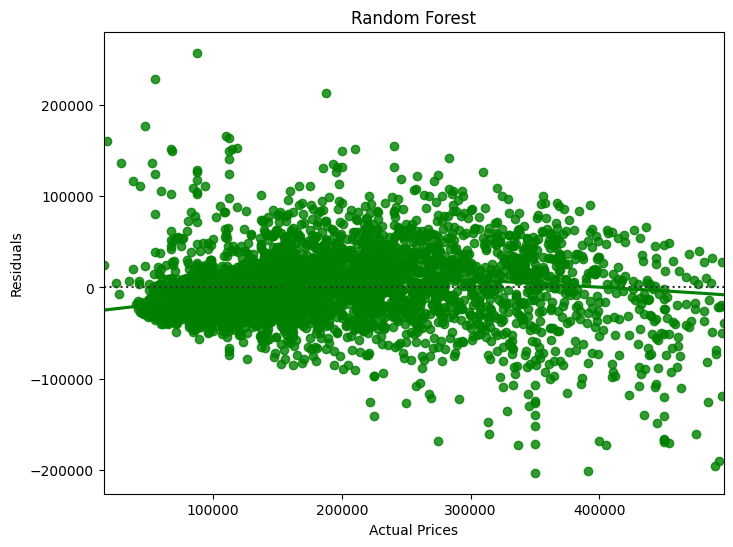

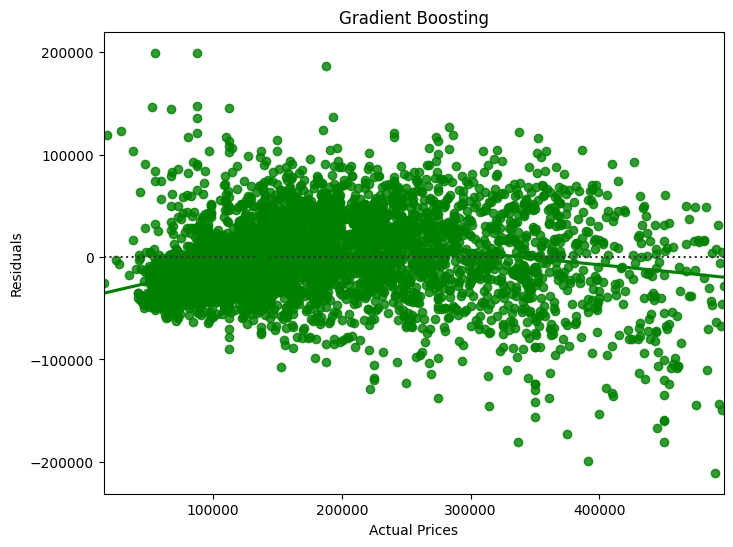

In [19]:
# 7. Evaluate the models
results = {}
for name, pipeline in models.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Feature Importance": model.named_steps['model'].feature_importances_ if hasattr(model.named_steps['model'], 'feature_importances_') else None
    }
    # Residual plot for model evaluation
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
    plt.title(name)
    plt.xlabel('Actual Prices')
    plt.ylabel('Residuals')
    plt.show()

In [20]:
# 8. Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f" - MAE: {metrics['MAE']}")
    print(f" - MSE: {metrics['MSE']}")
    print(f" - R2: {metrics['R2']}")
    if metrics['Feature Importance'] is not None:
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': metrics['Feature Importance']
        }).sort_values(by='Importance', ascending=False)
        print(" - Feature Importance:\n", importance_df.head(10),"\n")
    else:
        print("")
        

Linear Regression:
 - MAE: 45409.34957522431
 - MSE: 3723296209.6917253
 - R2: 0.611641931239864

Random Forest:
 - MAE: 30196.728129770992
 - MSE: 2045990136.7304988
 - R2: 0.7865931869361715
 - Feature Importance:
                        Feature  Importance
7                median_income    0.439857
8       ocean_proximity_INLAND    0.156441
0                    longitude    0.119918
1                     latitude    0.114192
2           housing_median_age    0.046238
5                   population    0.036281
3                  total_rooms    0.030254
4               total_bedrooms    0.023603
6                   households    0.021889
11  ocean_proximity_NEAR OCEAN    0.009558 

Gradient Boosting:
 - MAE: 36366.33664229556
 - MSE: 2589959603.9610796
 - R2: 0.729854501679744
 - Feature Importance:
                        Feature  Importance
7                median_income    0.532473
8       ocean_proximity_INLAND    0.206904
0                    longitude    0.096980
1              

In [21]:
# 9. Final Conclusion
best_model_name = min(results, key=lambda k: results[k]["MAE"])
print(f"The best model is {best_model_name} with the lowest MAE of {results[best_model_name]['MAE']}")

The best model is Random Forest with the lowest MAE of 30196.728129770992


# Addressing outlier with Log Transformation

In [22]:
df_encoded_log = df_encoded.copy()

In [23]:
df_encoded_log['log_median_house_value'] = np.log1p(df_encoded['median_house_value'])

In [24]:
df_encoded_log = df_encoded_log.drop('median_house_value', axis=1)

In [25]:
df_encoded_log.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,log_median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,False,False,True,False,13.022766
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,False,False,True,False,12.789687
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,False,False,True,False,12.771673
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,False,False,True,False,12.740520
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,False,False,True,False,12.743154


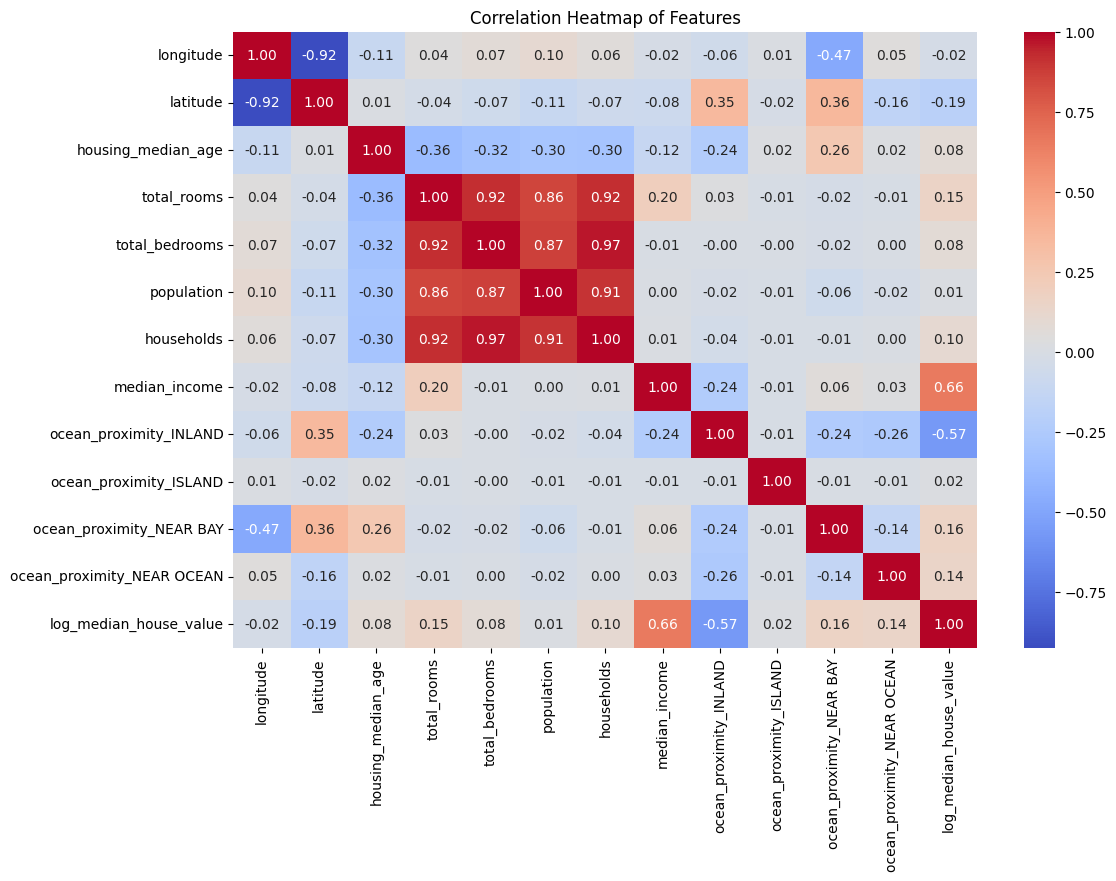

In [26]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded_log.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [27]:
target_log = 'log_median_house_value'
features_log = df_encoded_log.columns.drop([target_log])

In [28]:
# 5. Split the data into training and testing sets
X = df_encoded_log[features_log]
y = df_encoded_log[target_log]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [29]:
# 6. Create and train the models
models = {
    "Linear Regression": Pipeline(steps=[
                                         ('model', LinearRegression())]),
    "Random Forest": Pipeline(steps=[
                                     ('model', RandomForestRegressor(random_state=42))]),
    "Gradient Boosting": Pipeline(steps=[
                                         ('model', GradientBoostingRegressor(random_state=42))])
}


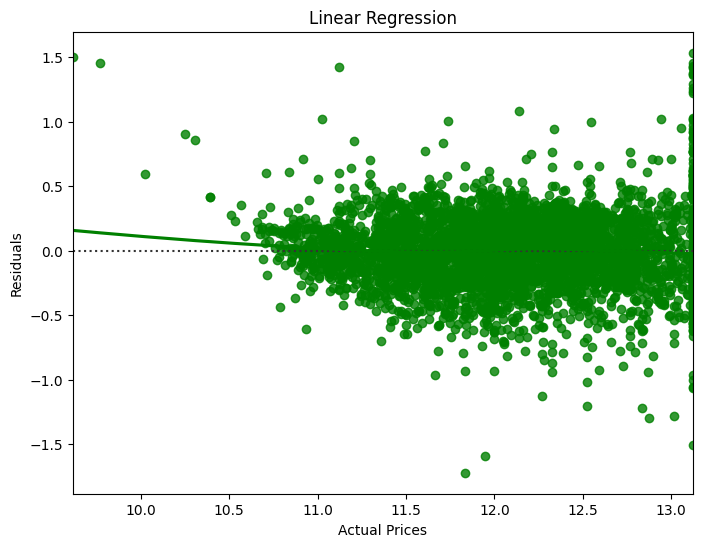

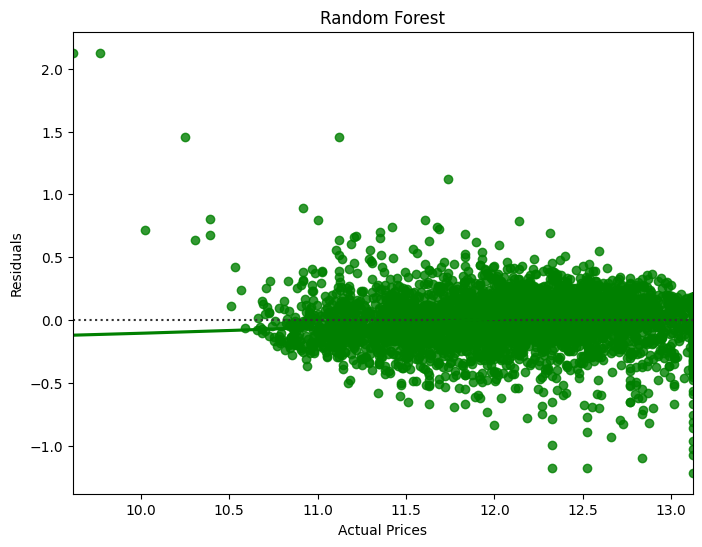

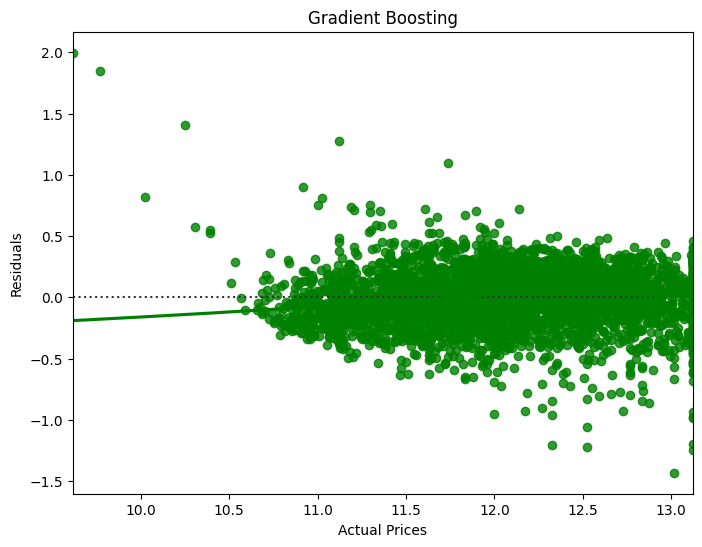

In [30]:
# 7. Evaluate the models
results = {}
for name, pipeline in models.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Feature Importance": model.named_steps['model'].feature_importances_ if hasattr(model.named_steps['model'], 'feature_importances_') else None
    }
    # Residual plot for model evaluation
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
    plt.title(name)
    plt.xlabel('Actual Prices')
    plt.ylabel('Residuals')
    plt.show()

In [31]:
# 8. Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f" - MAE: {metrics['MAE']}")
    print(f" - MSE: {metrics['MSE']}")
    print(f" - R2: {metrics['R2']}")
    if metrics['Feature Importance'] is not None:
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': metrics['Feature Importance']
        }).sort_values(by='Importance', ascending=False)
        print(" - Feature Importance:\n", importance_df.head(10),"\n")
    else:
        print("")
        

Linear Regression:
 - MAE: 0.2565759497126178
 - MSE: 0.11555397253982114
 - R2: 0.6439687774111811

Random Forest:
 - MAE: 0.15728915563475748
 - MSE: 0.053796227735758116
 - R2: 0.8342494307166453
 - Feature Importance:
                        Feature  Importance
7                median_income    0.368633
8       ocean_proximity_INLAND    0.301759
1                     latitude    0.106652
0                    longitude    0.095056
2           housing_median_age    0.033798
5                   population    0.030010
3                  total_rooms    0.022492
4               total_bedrooms    0.018971
6                   households    0.016953
11  ocean_proximity_NEAR OCEAN    0.004979 

Gradient Boosting:
 - MAE: 0.19405947229101253
 - MSE: 0.07170389298811015
 - R2: 0.7790744521904066
 - Feature Importance:
                        Feature  Importance
7                median_income    0.489775
8       ocean_proximity_INLAND    0.308552
1                     latitude    0.067116
0    

In [32]:
# 9. Final Conclusion
best_model_name = min(results, key=lambda k: results[k]["MAE"])
print(f"The best model is {best_model_name} with the lowest MAE of {results[best_model_name]['MAE']}")

The best model is Random Forest with the lowest MAE of 0.15728915563475748


# Addressing outliers with filtered cap and log transformation

In [33]:
df_encoded_filtered_log = df_encoded.copy()

In [34]:
# Remove rows where median_house_value is capped at 500,000
df_encoded_filtered_log = df_encoded_filtered_log[df_encoded_filtered_log['median_house_value'] < 500000].reset_index(drop=True)
# Add new column and apply Log Transformation on median_house_value column
df_encoded_filtered_log['log_median_house_value'] = np.log1p(df_encoded_filtered_log['median_house_value'])
# Remove original median_house_value column
df_encoded_filtered_log = df_encoded_filtered_log.drop('median_house_value', axis=1)


In [35]:
df_encoded_filtered_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19648 entries, 0 to 19647
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   19648 non-null  float64
 1   latitude                    19648 non-null  float64
 2   housing_median_age          19648 non-null  float64
 3   total_rooms                 19648 non-null  float64
 4   total_bedrooms              19648 non-null  float64
 5   population                  19648 non-null  float64
 6   households                  19648 non-null  float64
 7   median_income               19648 non-null  float64
 8   ocean_proximity_INLAND      19648 non-null  bool   
 9   ocean_proximity_ISLAND      19648 non-null  bool   
 10  ocean_proximity_NEAR BAY    19648 non-null  bool   
 11  ocean_proximity_NEAR OCEAN  19648 non-null  bool   
 12  log_median_house_value      19648 non-null  float64
dtypes: bool(4), float64(9)
memory u

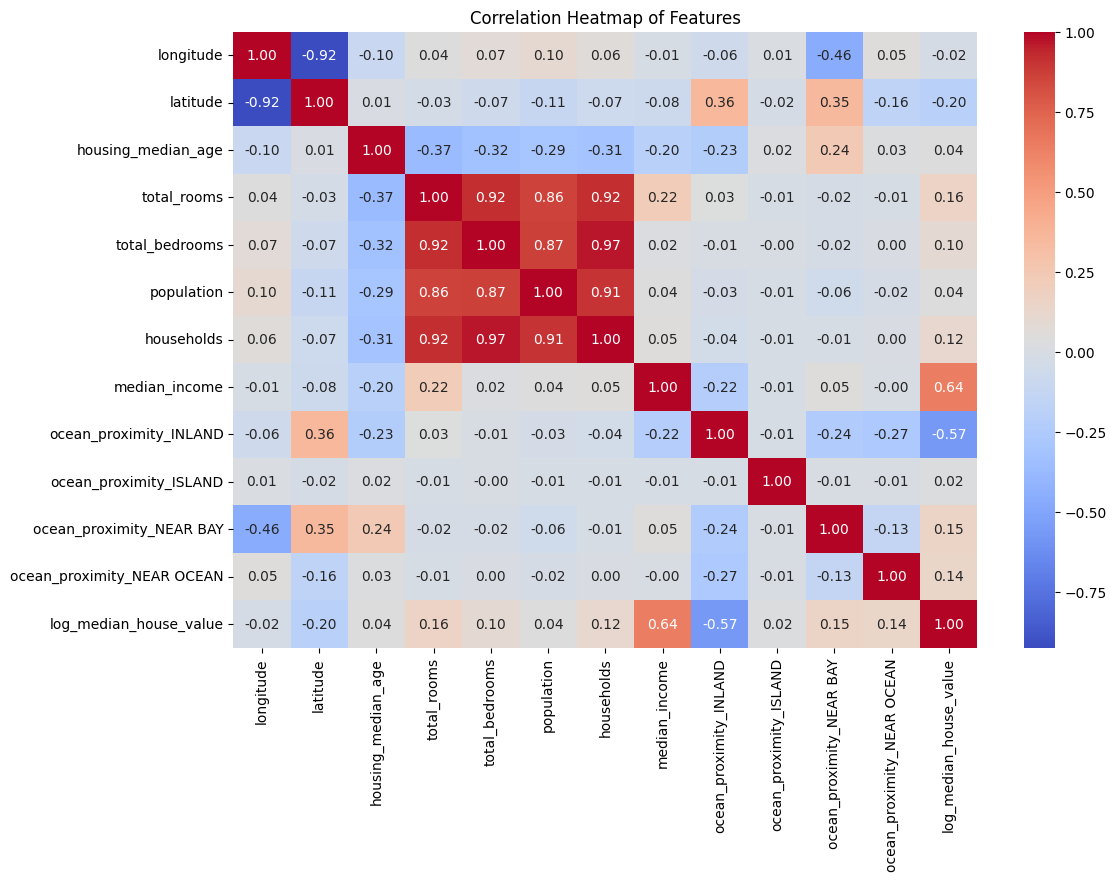

In [36]:
# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded_filtered_log.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [37]:
target_filtered_log = 'log_median_house_value'
features_filtered_log = df_encoded_filtered_log.columns.drop([target_filtered_log])

In [38]:
# 5. Split the data into training and testing sets
X = df_encoded_filtered_log[features_filtered_log]
y = df_encoded_filtered_log[target_filtered_log]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

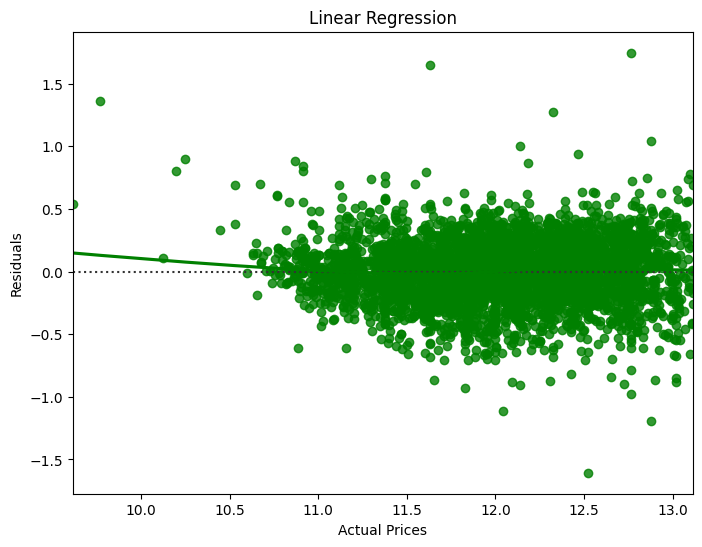

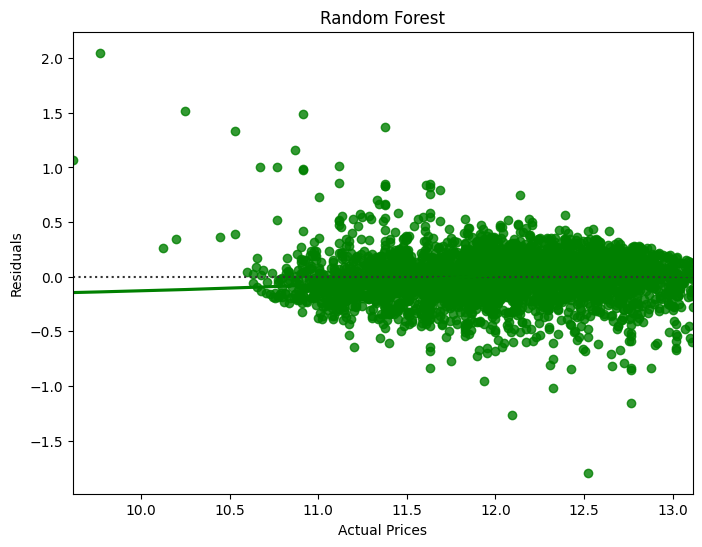

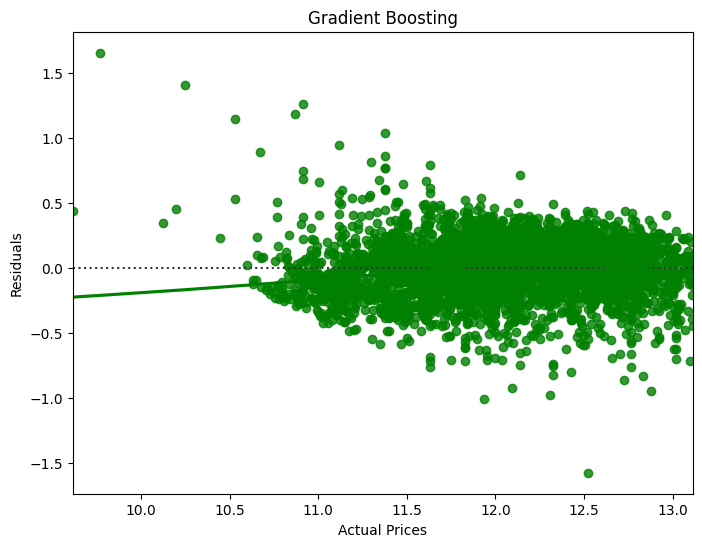

In [39]:
# 7. Evaluate the models
results = {}
for name, pipeline in models.items():
    model = pipeline.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred),
        "Feature Importance": model.named_steps['model'].feature_importances_ if hasattr(model.named_steps['model'], 'feature_importances_') else None
    }
    # Residual plot for model evaluation
    plt.figure(figsize=(8, 6))
    sns.residplot(x=y_test, y=y_pred, lowess=True, color='g')
    plt.title(name)
    plt.xlabel('Actual Prices')
    plt.ylabel('Residuals')
    plt.show()

In [40]:
# 8. Display the results
for model_name, metrics in results.items():
    print(f"{model_name}:")
    print(f" - MAE: {metrics['MAE']}")
    print(f" - MSE: {metrics['MSE']}")
    print(f" - R2: {metrics['R2']}")
    if metrics['Feature Importance'] is not None:
        importance_df = pd.DataFrame({
            'Feature': X_train.columns,
            'Importance': metrics['Feature Importance']
        }).sort_values(by='Importance', ascending=False)
        print(" - Feature Importance:\n", importance_df.head(10),"\n")
    else:
        print("")
        

Linear Regression:
 - MAE: 0.24270533177444417
 - MSE: 0.10117392533329925
 - R2: 0.6463793216606248

Random Forest:
 - MAE: 0.160081684002316
 - MSE: 0.05596197691536793
 - R2: 0.8044030398856965
 - Feature Importance:
                        Feature  Importance
7                median_income    0.331208
8       ocean_proximity_INLAND    0.321937
1                     latitude    0.110208
0                    longitude    0.101854
2           housing_median_age    0.033983
5                   population    0.032005
3                  total_rooms    0.025085
6                   households    0.019216
4               total_bedrooms    0.019103
11  ocean_proximity_NEAR OCEAN    0.004635 

Gradient Boosting:
 - MAE: 0.19612535499353426
 - MSE: 0.07028234168584684
 - R2: 0.754350844248118
 - Feature Importance:
                        Feature  Importance
7                median_income    0.411096
8       ocean_proximity_INLAND    0.380341
1                     latitude    0.074686
0       

In [41]:
# 9. Final Conclusion
best_model_name = min(results, key=lambda k: results[k]["MAE"])
print(f"The best model is {best_model_name} with the lowest MAE of {results[best_model_name]['MAE']}")

The best model is Random Forest with the lowest MAE of 0.160081684002316
